Modeling SRI and SARS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 


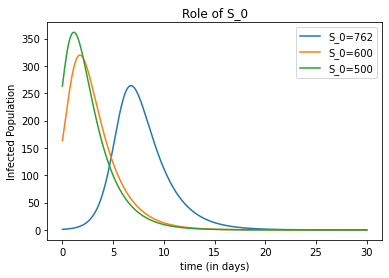

In [ ]:
N=763
S0=[762,600,500]
I0=[1,163,263];
R0=0
V0=0


a=0.5
p=0
mu=0
rpn = [0.8,0.9,1,1.1,1.2]
tp=30
dt=0.1
r=0.00218
lp=[3,4,5]
dur=7
tot_samp=int(tp/dt+1)
t=np.linspace(0,tp,tot_samp)
S=np.zeros(tot_samp)
I=np.zeros(tot_samp)
R=np.zeros(tot_samp)
V=np.zeros(tot_samp)
T=np.zeros(tot_samp)

#S[0]=S0
#I[0]=I0
R[0]=R0
V[0]=V0
T[0]=N

plt.figure()


for j in range(3):
  S[0]=S0[j]
  I[0]=I0[j]
  for i in range(1,tot_samp):
    S[i]=S[i-1]-(r*S[i-1]*I[i-1]+p*S[i-1]-mu*V[i-1])*dt
    R[i]=R[i-1]+(a*I[i-1])*dt
    I[i]=I[i-1]+(r*S[i-1]*I[i-1]-a*I[i-1])*dt
    V[i]=V[i-1]+(p*S[i-1]-mu*V[i-1])*dt
    T[i]=S[i]+R[i]+I[i]+V[i]

    #plt.plot(t,S)
  plt.plot(t,I,)
    #plt.plot(t,R)
    #plt.plot(t,V)
    #plt.plot(t,T)
plt.xlabel("time (in days)")
plt.ylabel("Infected Population")
plt.legend(["S_0=762","S_0=600","S_0=500",])
plt.title("Role of S_0")
plt.show()



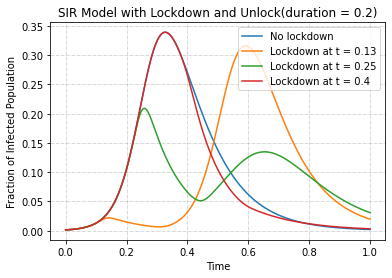

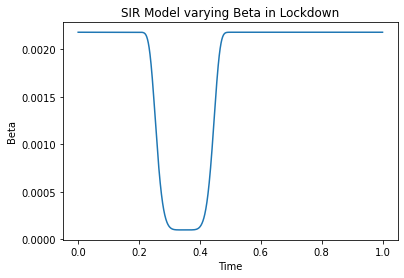

In [ ]:
+# improved increasing and decreading beta
# lockdown and unlock
beta = 0.00218
alpha = 0.5
t_end = 20
step_size = 0.01
total_steps= int(t_end/step_size)+1 
susceptible = np.zeros(total_steps)
infected = np.zeros(total_steps)
recovered = np.zeros(total_steps)
total = np.zeros(total_steps)
b = np.zeros(total_steps)
b[0] = beta
N = 763
susceptible[0]=float(762)
infected[0]=float(1)
recovered[0] = float(0)
total[0] = N

ld = [int(total_steps+100),int(total_steps/8),int(total_steps/4),int(total_steps/2-200)]
dur = 2*int(total_steps/10)
for j in range(len(ld)):
    count = 0
    for i in range(1,total_steps):
        beta = 0.00218 - np.exp( - ( (2*i - dur -2*ld[j])/dur )**6 )*(0.00208)
        if(j==2):
            b[i] = beta
        susceptible[i] = susceptible[i-1] -beta*susceptible[i-1]*infected[i-1]*step_size
        infected[i] = infected[i-1] + (beta*susceptible[i-1]*infected[i-1] - alpha*infected[i-1])*step_size
        recovered[i] = recovered[i-1] + alpha*infected[i-1]*step_size
        total[i] = susceptible[i]+infected[i]+recovered[i]

    x_axis=np.linspace(0,1,total_steps)
    plt.plot(x_axis,infected/N)
    
plt.title('SIR Model with Lockdown and Unlock(duration = '+str(round(dur/total_steps,2))+')')
plt.ylabel('Fraction of Infected Population')
plt.xlabel('Time')
plt.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.5,  
        alpha = 0.6)
plt.legend(['No lockdown','Lockdown at t = '+str(round((1+ld[1])/total_steps,2)),'Lockdown at t = '+str(round((1+ld[2])/total_steps,2)),'Lockdown at t = '+str(round((1+ld[3])/total_steps,2))], loc=1)
plt.show()

plt.plot(x_axis,b)
plt.title('SIR Model varying Beta in Lockdown')
plt.ylabel('Beta')
plt.xlabel('Time')
plt.show()